# Fmrate prediction

In [1]:
import numpy as np
import uproot as ur
import matplotlib.pyplot as plt
import pandas as pd
import copy
import sys

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

sys.path.append('../')

from src.utils import train_val_test_split

%matplotlib inline

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Split data

In [2]:
data_df = pd.read_csv("../data/fmrate_dataset.csv")

In [3]:
data_df

,time_since_saa,raz,decz,rax,decx,temperature,glon,glat,unix_time,fe_cosmic,...,rate[2],rate[3],rate[4],rate[5],rate[6],rate[7],rate[8],rate[9],rate[10],rate[11]
0,1470.0615,340.447390,34.386083,39.438089,-36.972051,33.6,69.831172,41.997769,1.483525e+09,8323.0,...,9.175346,2.398795,0.000000,144902.177530,45712.324384,13845.953080,8356.903924,2438.513754,239474.841087,11744.694832
1,1530.0690,344.948899,34.294665,40.152989,-39.919769,33.7,74.831447,42.486682,1.483526e+09,7893.0,...,12.970488,0.977676,0.000000,153318.962241,48581.165475,14829.628152,8883.639889,2635.849803,253521.561985,12586.337166
2,1590.0730,349.471306,34.021657,40.929578,-42.707255,33.8,79.894200,42.732372,1.483526e+09,8616.0,...,22.955236,6.997275,1.440506,153940.468185,48497.795501,14516.429778,8760.980672,2490.574534,253464.050166,12447.241383
3,1650.0795,353.998464,33.578979,41.795244,-45.338568,33.9,84.978480,42.730839,1.483526e+09,7961.0,...,10.679009,0.000000,0.000000,153332.226326,48214.601357,14549.504555,8738.605590,2533.338163,253057.586337,12516.820358
4,1710.0840,358.501904,32.952299,42.798457,-47.833584,34.0,90.041732,42.481912,1.483526e+09,7857.0,...,10.958631,1.675759,0.000000,152311.547934,48175.919461,14699.423072,8731.916784,2473.908613,249121.718756,12395.476760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64677,0.0000,70.353786,-29.267651,100.477836,57.059095,34.3,102.504047,-39.787169,1.489744e+09,19174.0,...,20.845726,0.000000,0.000000,421381.161376,91254.976413,18187.144117,10166.549068,2520.873146,675029.015069,17152.212729
64678,0.0000,74.590641,-30.153896,98.939578,57.476146,34.3,107.186486,-40.836773,1.489745e+09,21385.0,...,15.407485,0.498087,0.000000,493352.601640,91960.388522,18408.719222,10437.676092,2687.357262,787895.241321,17259.848070
64679,0.0000,78.749244,-30.790904,97.410511,57.831276,34.4,111.848502,-41.645589,1.489745e+09,22211.0,...,19.850554,3.139644,0.000000,381079.484260,80642.260970,19433.904554,10932.724402,2747.667543,648988.657261,17762.022693
64680,0.0000,83.137941,-31.353051,95.710760,58.025618,34.4,116.784951,-42.257397,1.489745e+09,23759.0,...,19.554150,1.672301,0.000000,339358.361808,78711.053376,20140.309630,11353.850287,2851.749516,594285.018883,18096.580711


In [4]:
data_df.columns

Index(['time_since_saa', 'raz', 'decz', 'rax', 'decx', 'temperature', 'glon',
       'glat', 'unix_time', 'fe_cosmic', 'is_orbit_up', 'altitude', 'sun',
       'sun_spot', 'B_r', 'B_theta', 'B_phi', 'rate[0]', 'rate[1]', 'rate[2]',
       'rate[3]', 'rate[4]', 'rate[5]', 'rate[6]', 'rate[7]', 'rate[8]',
       'rate[9]', 'rate[10]', 'rate[11]'],
      dtype='object')

In [5]:
X = data_df[["unix_time", "fe_cosmic"]] # .drop(columns=[f"rate[{i}]" for i in range(12)])
y = data_df[[f"rate[{i}]" for i in range(12)]]

In [6]:
X

,unix_time,fe_cosmic
0,1.483525e+09,8323.0
1,1.483526e+09,7893.0
2,1.483526e+09,8616.0
3,1.483526e+09,7961.0
4,1.483526e+09,7857.0
...,...,...
64677,1.489744e+09,19174.0
64678,1.489745e+09,21385.0
64679,1.489745e+09,22211.0
64680,1.489745e+09,23759.0


In [7]:
y

,rate[0],rate[1],rate[2],rate[3],rate[4],rate[5],rate[6],rate[7],rate[8],rate[9],rate[10],rate[11]
0,56941.760321,1264.897761,9.175346,2.398795,0.000000,144902.177530,45712.324384,13845.953080,8356.903924,2438.513754,239474.841087,11744.694832
1,58123.694878,1296.198799,12.970488,0.977676,0.000000,153318.962241,48581.165475,14829.628152,8883.639889,2635.849803,253521.561985,12586.337166
2,58244.963030,1278.068894,22.955236,6.997275,1.440506,153940.468185,48497.795501,14516.429778,8760.980672,2490.574534,253464.050166,12447.241383
3,58325.603325,1293.320262,10.679009,0.000000,0.000000,153332.226326,48214.601357,14549.504555,8738.605590,2533.338163,253057.586337,12516.820358
4,57655.444528,1226.298473,10.958631,1.675759,0.000000,152311.547934,48175.919461,14699.423072,8731.916784,2473.908613,249121.718756,12395.476760
...,...,...,...,...,...,...,...,...,...,...,...,...
64677,166768.282730,3383.497463,20.845726,0.000000,0.000000,421381.161376,91254.976413,18187.144117,10166.549068,2520.873146,675029.015069,17152.212729
64678,201208.113638,3954.093915,15.407485,0.498087,0.000000,493352.601640,91960.388522,18408.719222,10437.676092,2687.357262,787895.241321,17259.848070
64679,168499.665785,3143.015693,19.850554,3.139644,0.000000,381079.484260,80642.260970,19433.904554,10932.724402,2747.667543,648988.657261,17762.022693
64680,157398.392828,2854.361729,19.554150,1.672301,0.000000,339358.361808,78711.053376,20140.309630,11353.850287,2851.749516,594285.018883,18096.580711


In [8]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y,
                                                                      val_size=0.2,
                                                                      test_size=0.2,
                                                                      random_state=42,
                                                                      shuffle=True)

In [9]:
[el.shape for el in [X_train, X_val, X_test, y_train, y_val, y_test]]

[(38808, 2), (12937, 2), (12937, 2), (38808, 12), (12937, 12), (12937, 12)]

**We're not allowed to use the test set to make any decision !!**

## Preprocessing

- https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
- https://youtu.be/juEOOQntrd0

## Basic Fully Connected NN

In [10]:
estimator = MLPRegressor(hidden_layer_sizes=[100, 100], random_state=42, max_iter=500)
pipe = make_pipeline(StandardScaler(), estimator)

In [11]:
pipe.fit(X_train.drop(columns=["unix_time"]), y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[100, 100], max_iter=500,
                              random_state=42))])

In [12]:
pred = pipe.predict(X_val.drop(columns=["unix_time"]))
pd.DataFrame(pred)

,0,1,2,3,4,5,6,7,8,9,10,11
0,68618.981840,1513.236876,13.187662,-1.251271,-0.568187,171595.240318,48545.680487,13289.254506,7768.523483,2182.700241,283052.052314,11695.042672
1,104337.514420,2040.774108,16.419345,-2.171095,-0.880949,231642.699179,63222.975814,16112.115270,9295.951261,2532.210006,404686.543689,14626.794125
2,60612.153726,1367.338674,12.268139,-1.119801,-0.528174,158257.398669,44670.838743,12367.720015,7269.379391,2064.923231,254848.915258,10794.588224
3,43713.007437,949.473551,9.383763,-0.843874,-0.389350,129924.268453,34016.620936,9219.260548,5557.267186,1649.631055,191173.189713,7891.431978
4,58423.449738,1313.218599,11.894567,-1.084064,-0.510194,154587.814772,43290.950753,11959.945227,7047.634058,2011.136393,246601.912003,10418.584044
...,...,...,...,...,...,...,...,...,...,...,...,...
12932,121956.673422,2272.742001,17.534424,-2.681753,-1.013643,261980.352945,70439.293199,17408.463540,9962.174213,2640.902381,464700.400083,15961.793057
12933,42826.672764,927.557157,9.232482,-0.829402,-0.382069,128438.238610,33457.823321,9054.128610,5467.469490,1627.849608,187833.494180,7739.165822
12934,42559.867939,920.959875,9.186944,-0.825046,-0.379877,127990.913300,33289.613834,9004.420526,5440.438551,1621.292948,186828.177668,7693.330602
12935,46729.258594,1024.056381,9.898582,-0.893123,-0.414128,134981.318989,35918.243435,9781.214646,5862.854246,1723.754652,202538.378083,8409.603029


In [13]:
y_val

,rate[0],rate[1],rate[2],rate[3],rate[4],rate[5],rate[6],rate[7],rate[8],rate[9],rate[10],rate[11]
0,63714.487231,1223.650552,9.334296,1.105197,0.000000,151092.152316,44955.312493,12165.963757,7023.230979,1912.205616,260762.629681,10760.596886
1,67711.925025,1607.662435,16.864431,1.100319,0.000000,183076.529341,62626.598177,18316.663814,10639.850081,2858.243524,297125.316997,15933.804070
2,55774.134068,1198.781719,12.524857,2.399933,0.000000,147956.343629,43724.464878,12372.556492,7251.458890,2012.472125,239765.939522,10568.263605
3,47059.098109,1065.865044,8.746947,1.429096,0.000000,135892.020199,33874.406058,8553.290799,4992.267112,1403.965876,205017.112127,7774.789680
4,54282.384588,1134.889051,11.642484,2.674487,0.000000,151723.024742,43410.263887,12553.080129,7342.095191,1950.565334,232745.662310,10490.552228
...,...,...,...,...,...,...,...,...,...,...,...,...
12932,116918.264377,1886.088149,20.081289,3.532154,0.000000,199967.189814,62288.267914,16758.780412,9594.698500,2463.608980,415697.808169,15501.675469
12933,39994.685070,952.063362,3.009176,1.754939,0.000000,121876.827317,30528.564993,8202.976469,4871.864938,1372.358619,178714.044216,6995.930446
12934,47145.563931,1016.822680,9.931920,0.954286,0.000000,136680.763003,34549.799903,9396.764113,5637.066540,1684.266364,203431.800433,8156.340244
12935,40088.039053,1044.381334,11.241683,1.739397,0.000000,135010.976846,41569.797539,13708.903615,8488.094385,2680.193162,190127.748876,11045.473511


### Visualization

Let's only look at `rate[0]`

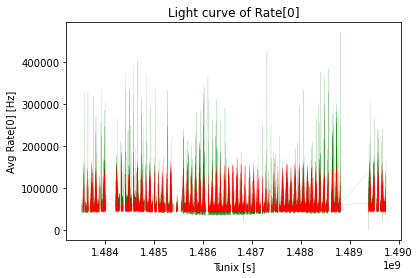

In [14]:
argsort = np.argsort(X_val["unix_time"])[::-1]
sorted_time_val = X_val["unix_time"][argsort]
sorted_y_val_r0 = y_val.loc[:, "rate[0]"][argsort]
sorted_val_r0 = pred[:, 0][argsort]

fig_val_prediction_rate_0, ax = plt.subplots()
ax.plot(sorted_time_val, sorted_y_val_r0, '-g', linewidth=0.1)
ax.plot(sorted_time_val, sorted_val_r0, '-r', linewidth=0.1)
ax.set_xlabel("Tunix [s]")
ax.set_ylabel("Avg Rate[0] [Hz]")  # Nb. photons per second (averaged over each bin)
ax.set_title("Light curve of Rate[0]")
plt.show()

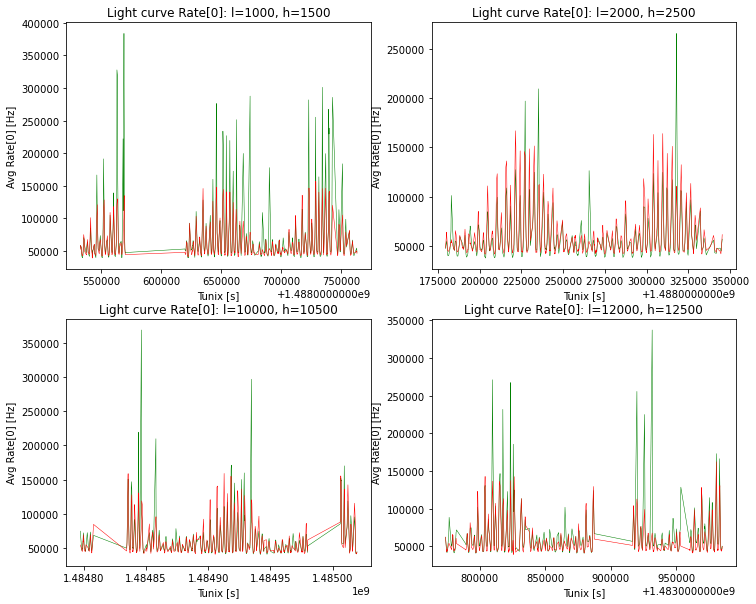

In [15]:
low_n = 1000
high_n = 1500
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, (low_n, high_n) in enumerate([(1000, 1500), (2000, 2500),
                                   (10000, 10500), (12000, 12500)]):
    axs[i//2, i%2].plot(sorted_time_val[low_n:high_n], sorted_y_val_r0[low_n:high_n], '-g', linewidth=0.5)
    axs[i//2, i%2].plot(sorted_time_val[low_n:high_n], sorted_val_r0[low_n:high_n], '-r', linewidth=0.5)
    axs[i//2, i%2].set_xlabel("Tunix [s]")
    axs[i//2, i%2].set_ylabel("Avg Rate[0] [Hz]")  # Nb. photons per second (averaged over each bin)
    axs[i//2, i%2].set_title(f"Light curve Rate[0]: l={low_n}, h={high_n}")
plt.show()

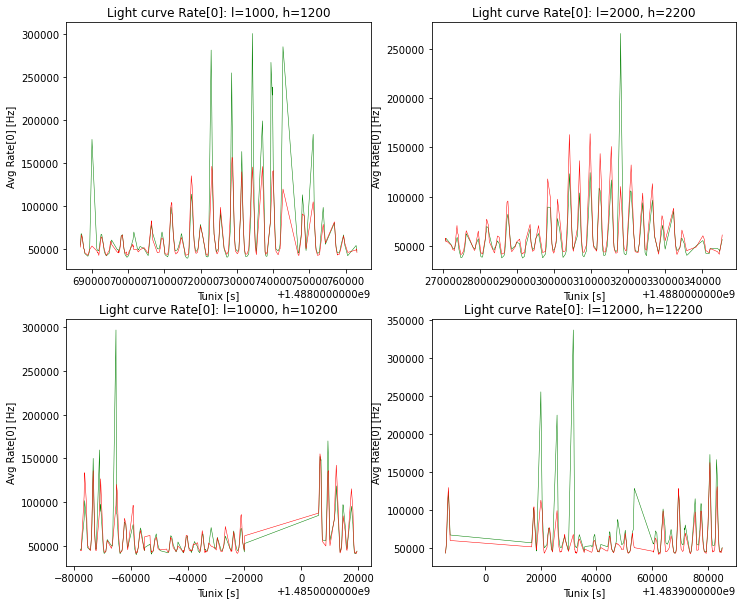

In [16]:
low_n = 1000
high_n = 1500
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, (low_n, high_n) in enumerate([(1000, 1200), (2000, 2200),
                                   (10000, 10200), (12000, 12200)]):
    axs[i//2, i%2].plot(sorted_time_val[low_n:high_n], sorted_y_val_r0[low_n:high_n], '-g', linewidth=0.5)
    axs[i//2, i%2].plot(sorted_time_val[low_n:high_n], sorted_val_r0[low_n:high_n], '-r', linewidth=0.5)
    axs[i//2, i%2].set_xlabel("Tunix [s]")
    axs[i//2, i%2].set_ylabel("Avg Rate[0] [Hz]")  # Nb. photons per second (averaged over each bin)
    axs[i//2, i%2].set_title(f"Light curve Rate[0]: l={low_n}, h={high_n}")
plt.show()

In [17]:
fitted_mlp = pipe["mlpregressor"]

In [18]:
np.sqrt(fitted_mlp.loss_), np.std(sorted_y_val_r0)

(24072.977067386615, 33781.365942676144)

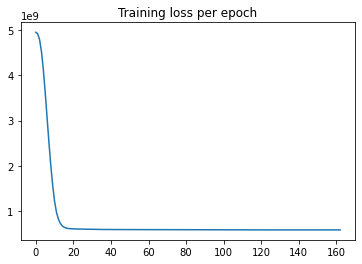

In [19]:
fig_train_loss_per_epoch, ax = plt.subplots()

ax.plot(fitted_mlp.loss_curve_)
ax.set_title("Training loss per epoch")
plt.show()

The loss is still quiet huge

In [20]:
fitted_mlp.coefs_

[array([[ 6.08799858e-316,  3.63107120e+000,  3.50294396e+000,
          3.50993602e+000, -1.19124625e+000, -1.09725078e+000,
         -1.10646057e+000,  3.62409231e+000,  3.40368995e+000,
          3.54177886e+000, -1.08986512e+000,  3.61167432e+000,
          3.64169628e+000, -1.17281120e+000, -1.15437288e+000,
         -1.17672026e+000, -1.16341546e+000, -6.78195123e-316,
          3.42166233e+000, -1.14553476e+000,  3.51133269e+000,
         -1.18488289e+000, -1.11667296e+000,  1.01955739e-315,
          1.73210423e-317,  3.56865813e+000, -1.18000054e+000,
          3.45075696e+000, -1.28238886e-315, -1.13667526e+000,
          1.59729002e-002, -1.09602770e+000, -9.69788574e+000,
          3.65635804e+000,  3.72549357e+000,  3.55830217e+000,
         -1.13470024e+000, -1.17432626e+000,  3.48153422e+000,
          3.42307781e+000, -1.19190124e+000,  1.07996125e-315,
         -1.12717626e+000,  3.62255743e+000, -1.09180163e+000,
          3.51392834e+000, -1.13723667e+000, -3.1002984

**TODO: try compare it with linear regression only using `fe_cosmic`. Also show validation loss for each epoch !**

### Residual plot
**Warning: we're gonna use the whole dataset, careful about data leakage**

In [21]:
# predict using the whole X.. just to observe the residuals
pred_X_nn = pipe.predict(X.drop(columns=["unix_time"]))

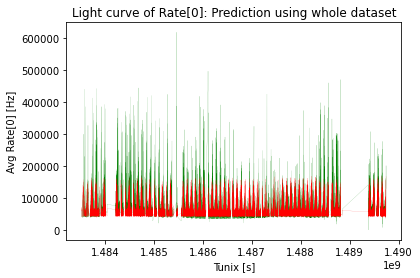

In [22]:
def plot_pred(X, y, pred_X, show=True, title="Light curve of Rate[0]: Prediction using whole dataset"):
    fig, ax = plt.subplots()
    ax.plot(X["unix_time"], y.loc[:, "rate[0]"], '-g', linewidth=0.1)
    ax.plot(X["unix_time"], pred_X[:, 0], '-r', linewidth=0.1)
    ax.set_xlabel("Tunix [s]")
    ax.set_ylabel("Avg Rate[0] [Hz]")  # Nb. photons per second (averaged over each bin)
    ax.set_title(title)
    if show: plt.show()
    return fig

fig_dataset_prediction_rate_0 = plot_pred(X, y, pred_X_nn)

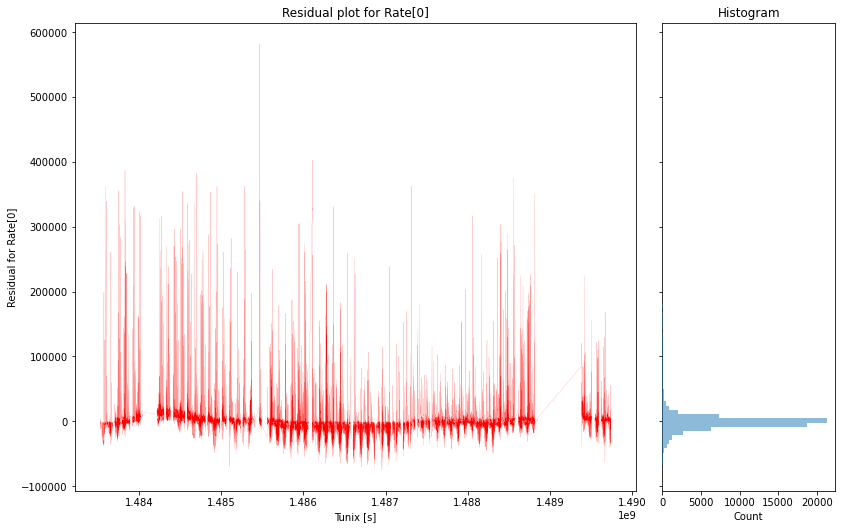

In [23]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.03
rect_residuals = [left, bottom, width, height]
rect_histy = [left + width + spacing, bottom, 0.2, height]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_axes(rect_residuals)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.plot(X["unix_time"], y.loc[:, "rate[0]"]-pred_X_nn[:, 0], '-r', linewidth=0.1)
ax.set_xlabel("Tunix [s]")
ax.set_ylabel("Residual for Rate[0]")  # Nb. photons per second (averaged over each bin)
ax.set_title("Residual plot for Rate[0]")


ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.set_title("Histogram")
ax_histy.set_xlabel("Count")


_ = ax_histy.hist(y.loc[:, "rate[0]"]-pred_X_nn[:, 0], bins=100, orientation='horizontal', alpha=0.5, zorder=np.inf)


plt.show()

**TODO: try compare it with linear regression only using `fe_cosmic`. Also show validation loss for each epoch !**

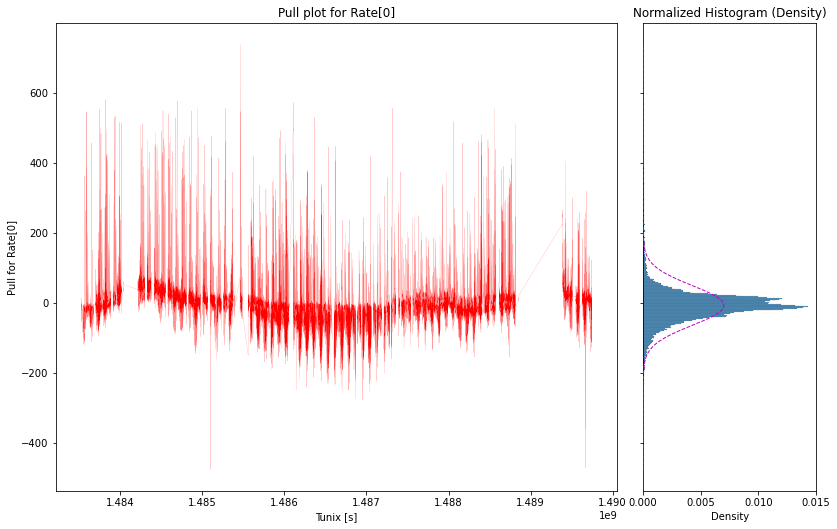

In [24]:
import seaborn as sns

def plot_pull(X, y, pred_X, show=True, 
              title="Pull plot for Rate[0]", 
              title_hist="Normalized Histogram (Density)"):
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.03
    rect_residuals = [left, bottom, width, height]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    fig = plt.figure(figsize=(12, 10))

    ax = fig.add_axes(rect_residuals)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)

    tmp = (y.loc[:, "rate[0]"]-pred_X[:, 0])/np.sqrt(y.loc[:, "rate[0]"])
    mask = ~np.isclose(y.loc[:, "rate[0]"], 0)

    ax.plot(X["unix_time"][mask], tmp[mask], '-r', linewidth=0.1)
    ax.set_xlabel("Tunix [s]")
    ax.set_ylabel("Pull for Rate[0]")  # Nb. photons per second  (averaged over each bin)
    ax.set_title(title)



    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histy.set_title(title_hist)


    # _ = ax_histy.hist(tmp[mask], bins=100, orientation='horizontal', alpha=0.5, zorder=np.inf)
    _ = sns.histplot(data=tmp[mask].to_frame("rate[0]"),
                     y="rate[0]",
                     stat="density",
                     ax=ax_histy)
    mean = np.mean(tmp[mask])
    std = np.std(tmp[mask])
    xs = np.linspace(tmp[mask].min(), tmp[mask].max(), 255)
    f = lambda x: 1/np.sqrt(2*np.pi*std**2)*np.exp(-(x-mean)**2/(2*std**2))
    _ = ax_histy.plot(f(xs), xs, zorder=np.inf, color="m", linewidth=1, linestyle="--")

    if show: plt.show()
    return fig

fig_dataset_pull_plot_rate_0 = plot_pull(X, y, pred_X_nn)

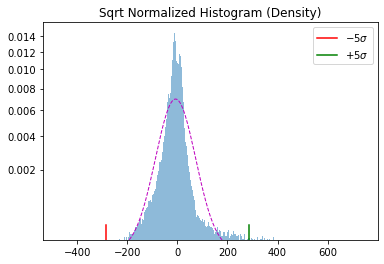

In [25]:
from matplotlib.scale import FuncScale


def plot(data, mean, std, transform="sqrt", show=True, title="Normalized Histogram (Density)"):
    f = lambda x, mean, std: 1/np.sqrt(2*np.pi*std**2)*np.exp(-(x-mean)**2/(2*std**2))
    
    fig, ax = plt.subplots()
#     _ = sns.histplot(data=data,
#                      x="rate[0]",
#                      stat="density",
#                      ax=ax)
    ax.hist(data, bins=500, alpha=0.5, density=True)

    xs = np.linspace(data.min(), data.max(), 255)
    ax.plot(xs, f(xs, mean, std), zorder=np.inf, color="m", linewidth=1, linestyle="--")
    ax.plot([-5*std, -5*std], [0, f(xs, mean, std).max()/36], 'r', label=r"$-5\sigma$")
    ax.plot([5*std, 5*std], [0, f(xs, mean, std).max()/36], 'g', label=r"$+5\sigma$")
    ax.legend()
    if transform == "sqrt":
        ax.set_yscale(FuncScale(0, (lambda x: np.sqrt(x), lambda x: np.power(x, 2))))
        if title is not None: ax.set_title("Sqrt Normalized Histogram (Density)")
    else:
        ax.set_title(title)
    if show: plt.show()
    return fig

tmp = (y.loc[:, "rate[0]"]-pred_X_nn[:, 0])/np.sqrt(y.loc[:, "rate[0]"])
mask = ~np.isclose(y.loc[:, "rate[0]"], 0)
mean = np.mean(tmp[mask])
std = np.std(tmp[mask])
    
_ = plot(tmp[mask].to_frame("rate[0]"), mean, std)

In [26]:
5*std

284.86177858700506

In [27]:
def find_std(data):
    low = -np.inf
    high = np.inf
    prev_std = np.inf
    std = np.std(data)
    mean = np.mean(data)
    
    while ~np.isclose(prev_std, std):
        # Update interval
        low = -3*std + mean
        high = 3*std + mean
        
        prev_std = std
        std = np.std(data[(data>low) & (data<high)])
        print(mean, std, low, high)
    return mean, std

In [28]:
new_mean, new_std = find_std(tmp[mask])

-7.39382317888926 41.15283415574622 -178.3108903310923 163.5232439733138
-7.39382317888926 36.573842789247735 -130.85232564612792 116.0646792883494
-7.39382317888926 34.70430095620935 -117.11535154663247 102.32770518885394
-7.39382317888926 33.83877111163065 -111.50672604751732 96.71907968973879
-7.39382317888926 33.45362422861406 -108.91013651378121 94.12249015600268
-7.39382317888926 33.30003891583559 -107.75469586473145 92.96704950695292
-7.39382317888926 33.2361165529082 -107.29393992639605 92.50629356861752
-7.39382317888926 33.20829839561752 -107.10217283761386 92.31452647983534
-7.39382317888926 33.19338986284293 -107.01871836574182 92.23107200796329
-7.39382317888926 33.186971913711915 -106.97399276741804 92.18634640963951
-7.39382317888926 33.18491777047036 -106.95473892002501 92.16709256224648
-7.39382317888926 33.18491777047036 -106.94857649030035 92.16093013252183


In [29]:
std, new_std

(56.972355717401015, 33.18491777047036)

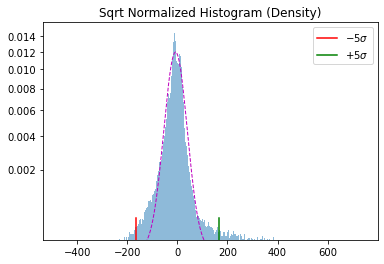

In [30]:
_ = plot(tmp[mask].to_frame("rate[0]"), mean, new_std)

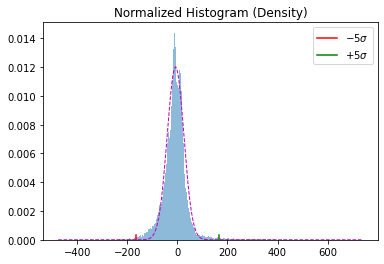

In [31]:
fig_dataset_reduced_pull_hist_rate_0 = plot(tmp[mask].to_frame("rate[0]"), mean, new_std, transform=None)

**Weights and biases logs**

In [32]:
import wandb
from wandb.sklearn import plot_learning_curve

model = pipe
model_params = model.get_params()

# Wandb:
with wandb.init(project='POLAR-background-prediction', config=model_params):
    wandb.config.update({"val_size": 0.2,
                         "test_size": 0.2,
                         "val_len": X_val.shape[0],
                         "test_len": X_test.shape[0],
                         "train_len": X_train.shape[0],
                         "random_state": 42,
                         "shuffle_data": True})

    wandb.log({"validation/prediction-rate-0": fig_val_prediction_rate_0})
    wandb.log({"dataset/prediction-rate-0": fig_dataset_prediction_rate_0})
    wandb.log({"train/loss": fig_train_loss_per_epoch})
    # wandb.log({"dataset/pull-plot-rate-0": fig_dataset_pull_plot_rate_0})  # TODO: make it work with W&B 
    # wandb.log({"dataset/pull-reduced-hist-rate-0": fig_dataset_reduced_pull_hist_rate_0})  # TODO: same as above
    # The last one doesn't work due to seaborn histplot and my vlines. It seems they can't convert matplotlib to pyplot correctly

wandb: Currently logged in as: stephane-nguyen. Use `wandb login --relogin` to force relogin


/home/zenchiyu/.local/lib/python3.10/site-packages/plotly/matplotlylib/renderer.py:647: UserWarning:

Looks like the annotation(s) you are trying 
to draw lies/lay outside the given figure size.

Therefore, the resulting Plotly figure may not be 
large enough to view the full text. To adjust 
the size of the figure, use the 'width' and 
'height' keys in the Layout object. Alternatively,
use the Margin object to adjust the figure's margins.



## Linear regression using `fe_cosmic`, to predict just `rate[0]`

In [33]:
result = stats.linregress(X_train["fe_cosmic"], y_train["rate[0]"])

print(f"Slope a: {result.slope}, Intercept b: {result.intercept},\nR^2: {result.rvalue**2}, p-value: {result.pvalue}")
print("\n"+f"std_a: {result.stderr}, std_b: {result.intercept_stderr}")

Slope a: 5.472109778951114, Intercept b: 25753.519783965356,
R^2: 0.5258888074026239, p-value: 0.0

std_a: 0.02637536642735104, std_b: 206.73566779100656


In [34]:
pred_linregress = X_test["fe_cosmic"]*result.slope + result.intercept

### Visualization

Let's only look at `rate[0]`

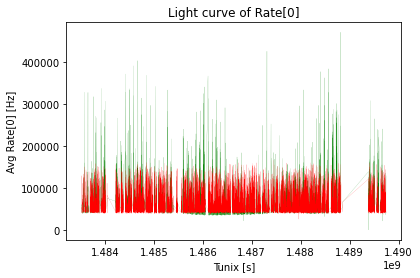

In [35]:
# argsort = np.argsort(X_val["unix_time"])[::-1]
# sorted_time_val = X_val["unix_time"][argsort]
# sorted_y_val_r0 = y_val.loc[:, "rate[0]"][argsort]
sorted_val_r0_linregress = pred_linregress[argsort]

plt.plot(sorted_time_val, sorted_y_val_r0, '-g', linewidth=0.1)
plt.plot(sorted_time_val, sorted_val_r0_linregress, '-r', linewidth=0.1)
plt.xlabel("Tunix [s]")
plt.ylabel("Avg Rate[0] [Hz]")  # Nb. photons per second (averaged over each bin)
plt.title("Light curve of Rate[0]")
plt.show()

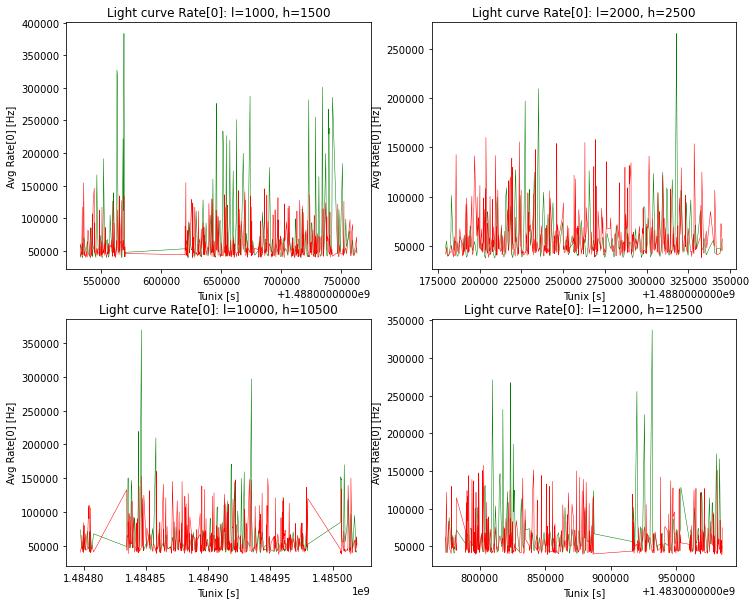

In [36]:
low_n = 1000
high_n = 1500
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, (low_n, high_n) in enumerate([(1000, 1500), (2000, 2500),
                                   (10000, 10500), (12000, 12500)]):
    axs[i//2, i%2].plot(sorted_time_val[low_n:high_n], sorted_y_val_r0[low_n:high_n], '-g', linewidth=0.5)
    axs[i//2, i%2].plot(sorted_time_val[low_n:high_n], sorted_val_r0_linregress[low_n:high_n], '-r', linewidth=0.5)
    axs[i//2, i%2].set_xlabel("Tunix [s]")
    axs[i//2, i%2].set_ylabel("Avg Rate[0] [Hz]")  # Nb. photons per second (averaged over each bin)
    axs[i//2, i%2].set_title(f"Light curve Rate[0]: l={low_n}, h={high_n}")
plt.show()

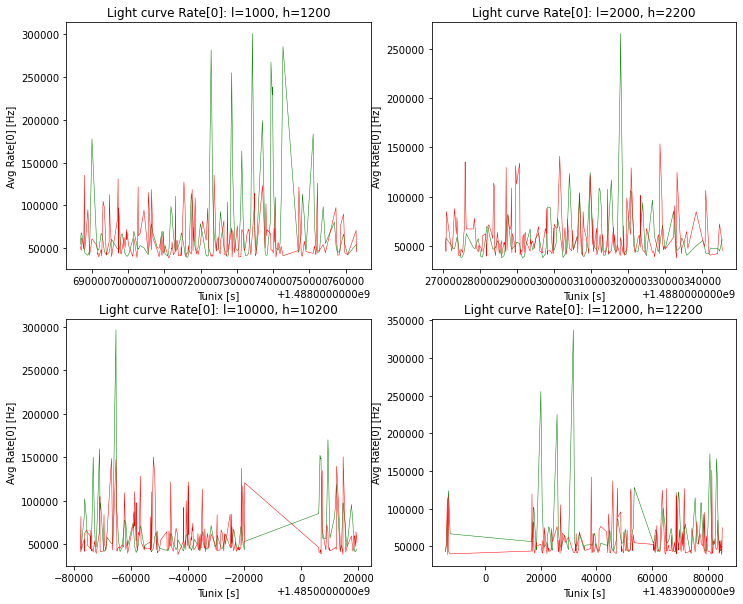

In [37]:
low_n = 1000
high_n = 1500
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, (low_n, high_n) in enumerate([(1000, 1200), (2000, 2200),
                                   (10000, 10200), (12000, 12200)]):
    axs[i//2, i%2].plot(sorted_time_val[low_n:high_n], sorted_y_val_r0[low_n:high_n], '-g', linewidth=0.5)
    axs[i//2, i%2].plot(sorted_time_val[low_n:high_n], sorted_val_r0_linregress[low_n:high_n], '-r', linewidth=0.5)
    axs[i//2, i%2].set_xlabel("Tunix [s]")
    axs[i//2, i%2].set_ylabel("Avg Rate[0] [Hz]")  # Nb. photons per second (averaged over each bin)
    axs[i//2, i%2].set_title(f"Light curve Rate[0]: l={low_n}, h={high_n}")
plt.show()

**TODO: measure the loss using linear regression instead of multi-layer perceptron**

In [38]:
# np.sqrt(fitted_mlp.loss_), np.std(sorted_y_val_r0)

### Residual plot
**Warning: we're gonna use the whole dataset, careful about data leakage**

In [39]:
# predict using the whole X (fe_cosmic).. just to observe the residuals
pred_X = X["fe_cosmic"]*result.slope + result.intercept

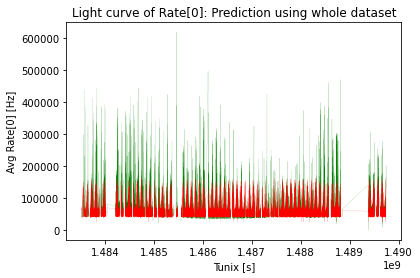

In [40]:
plt.plot(X["unix_time"], y.loc[:, "rate[0]"], '-g', linewidth=0.1)
plt.plot(X["unix_time"], pred_X, '-r', linewidth=0.1)
plt.xlabel("Tunix [s]")
plt.ylabel("Avg Rate[0] [Hz]")  # Nb. photons per second (averaged over each bin)
plt.title("Light curve of Rate[0]: Prediction using whole dataset")
plt.show()

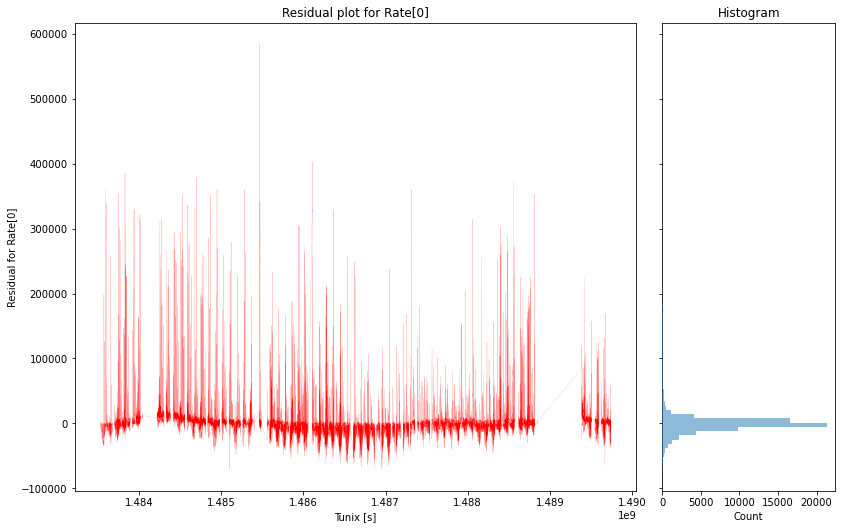

In [41]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.03
rect_residuals = [left, bottom, width, height]
rect_histy = [left + width + spacing, bottom, 0.2, height]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_axes(rect_residuals)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.plot(X["unix_time"], y.loc[:, "rate[0]"]-pred_X, '-r', linewidth=0.1)
ax.set_xlabel("Tunix [s]")
ax.set_ylabel("Residual for Rate[0]")  # Nb. photons per second (averaged over each bin)
ax.set_title("Residual plot for Rate[0]")



ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.set_title("Histogram")
ax_histy.set_xlabel("Count")


_ = ax_histy.hist(y.loc[:, "rate[0]"]-pred_X, bins=100, orientation='horizontal', alpha=0.5, zorder=np.inf)


plt.show()

**TODO: try compare via evaluation measures with NN**